# 0.0. __INIT__

## 0.1. Imports

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 0.2. Load Dataset

In [2]:
df_raw = pd.read_csv('../data/raw/data_raw.csv')

## 0.3. Helper Functions

In [3]:
def numerical_description(numerical: pd.DataFrame) -> pd.DataFrame:
    description = numerical.describe().T
    description['range'] = description['max'] - description['min']
    description['skew'] = numerical.skew()
    description['kurtosis'] = numerical.kurtosis()

    return description

# 1.0. Data Description

In [4]:
df1 = df_raw.copy()

In [5]:
df1.head()

,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,Male,23,11.0,152.0,1,< 1 Year,Yes,0,23367.0,249,0
1,Female,41,15.0,14.0,1,1-2 Year,No,1,31409.0,221,0
2,Female,25,35.0,152.0,1,< 1 Year,No,1,46622.0,299,0
3,Female,26,8.0,160.0,1,< 1 Year,No,0,2630.0,136,0
4,Male,45,8.0,124.0,1,1-2 Year,Yes,0,42297.0,264,0


## 1.1. Data Dimension

In [6]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 381109
Number of columns: 11


## 1.2. Data types

In [7]:
df1.dtypes

gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

## 1.3. Check NA

In [8]:
df1.isna().sum()

gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

## 1.4. Data Descriptive

In [11]:
numerical = df1.select_dtypes(include=['int64', 'float64'])
categorical = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [12]:
numerical_description(numerical)

,count,mean,std,min,25%,50%,75%,max,range,skew,kurtosis
age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0,65.0,0.672539,-0.565655
region_code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0,52.0,-0.115266,-0.867857
policy_sales_channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0,162.0,-0.900008,-0.970810
driving_license,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0,1.0,-21.595182,464.354302
previously_insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0,1.0,0.167747,-1.971871
annual_premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0,537535.0,1.766087,34.004569
vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0,289.0,0.003030,-1.200688
response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0,1.0,2.301906,3.298788


# 2.0 Feature Engineering

In [13]:
df2 = df1.copy()

In [14]:
df2['vehicle_age'].unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [15]:
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x == 'yes' else 0)
df2.head()

,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,Male,23,11.0,152.0,1,< 1 Year,0,0,23367.0,249,0
1,Female,41,15.0,14.0,1,1-2 Year,0,1,31409.0,221,0
2,Female,25,35.0,152.0,1,< 1 Year,0,1,46622.0,299,0
3,Female,26,8.0,160.0,1,< 1 Year,0,0,2630.0,136,0
4,Male,45,8.0,124.0,1,1-2 Year,0,0,42297.0,264,0


# 3.0. Data Filtering

In [16]:
df3 = df2.copy()

# 4.0. EDA

In [17]:
df4 = df3.copy()

## 4.1. Univariate Analysis

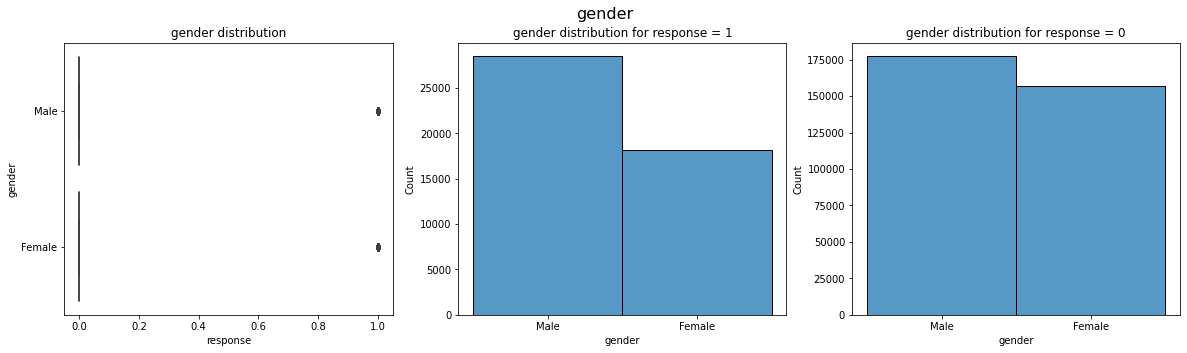

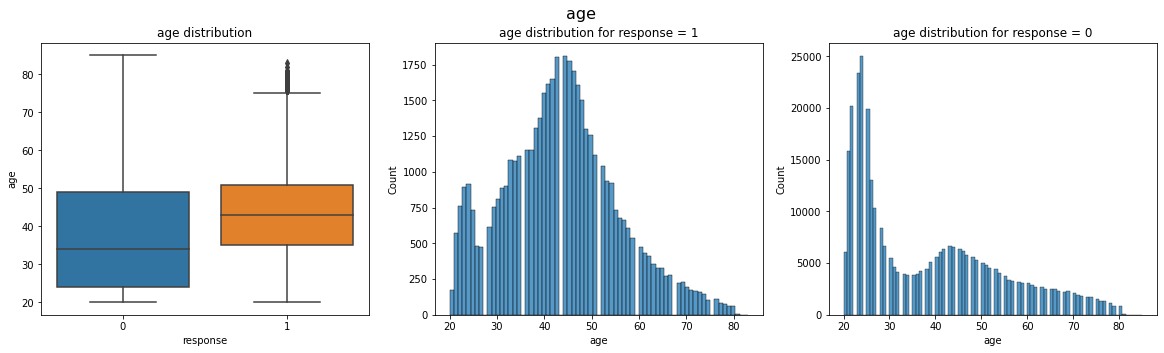

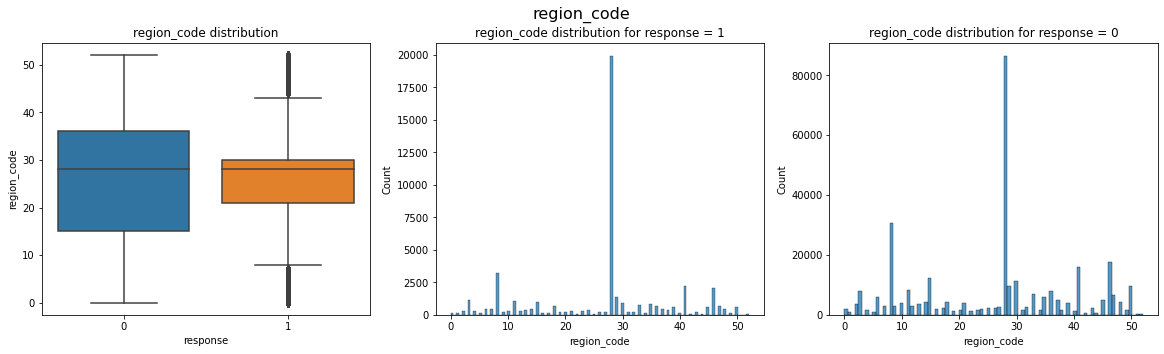

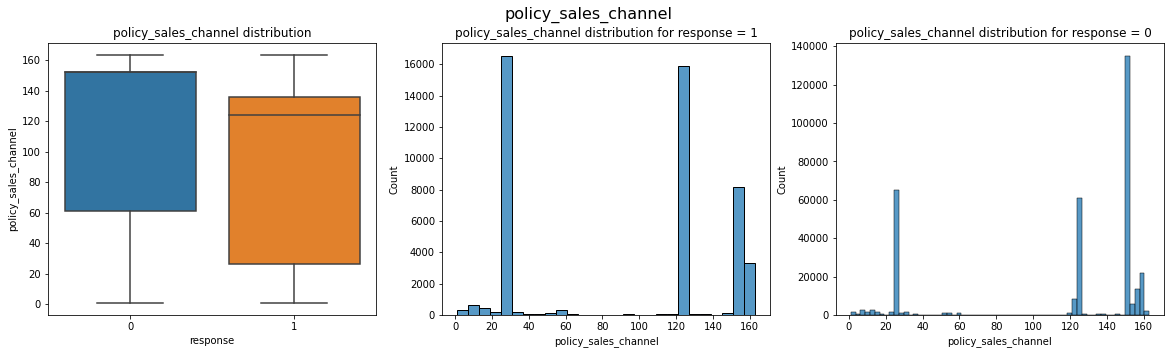

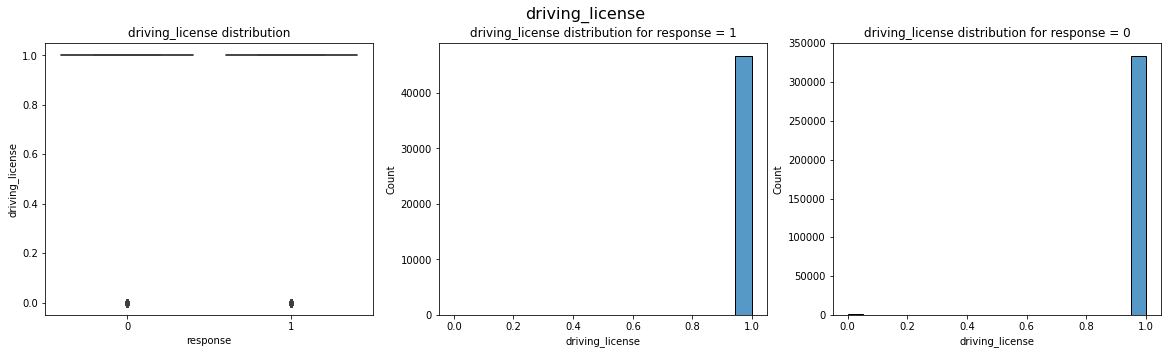

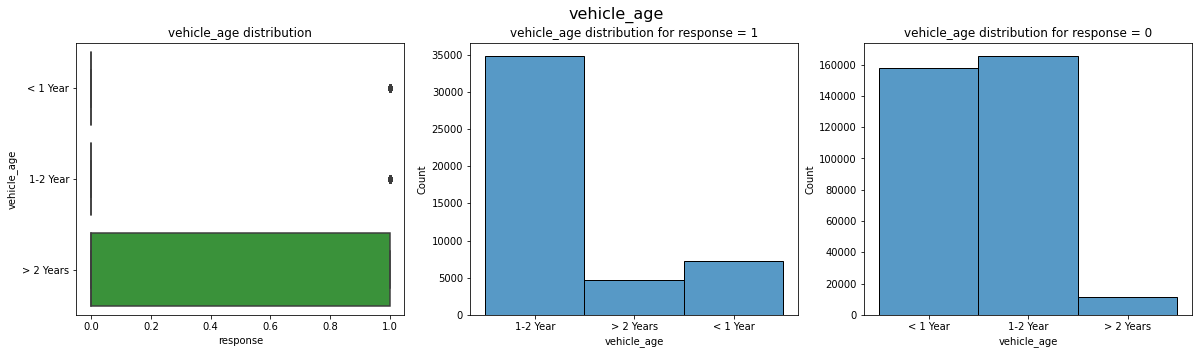

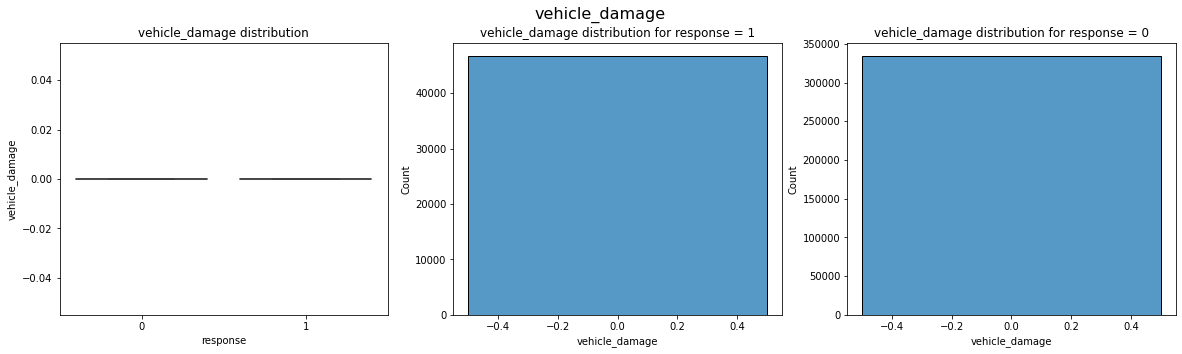

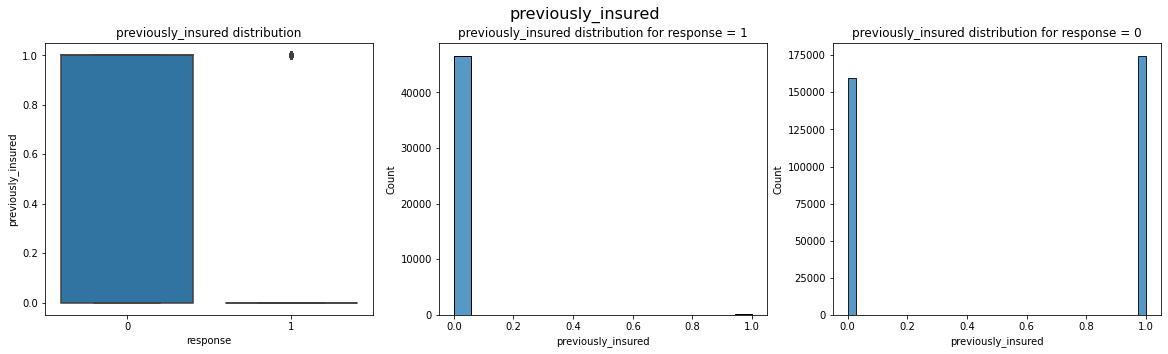

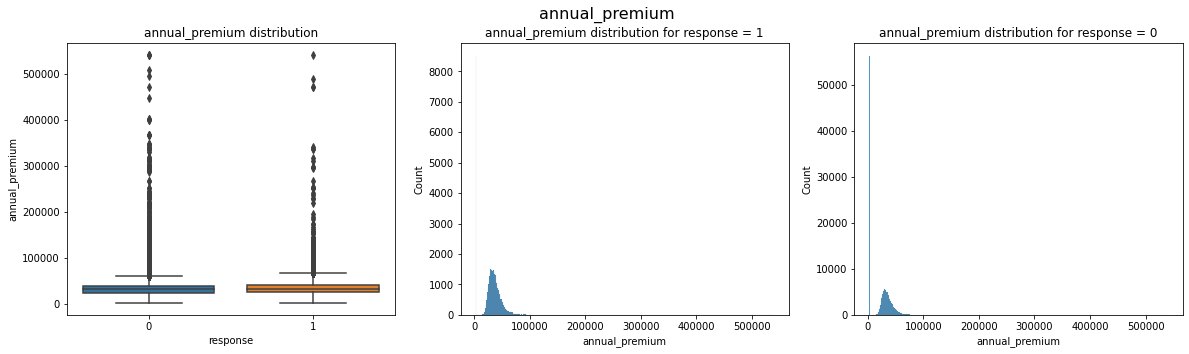

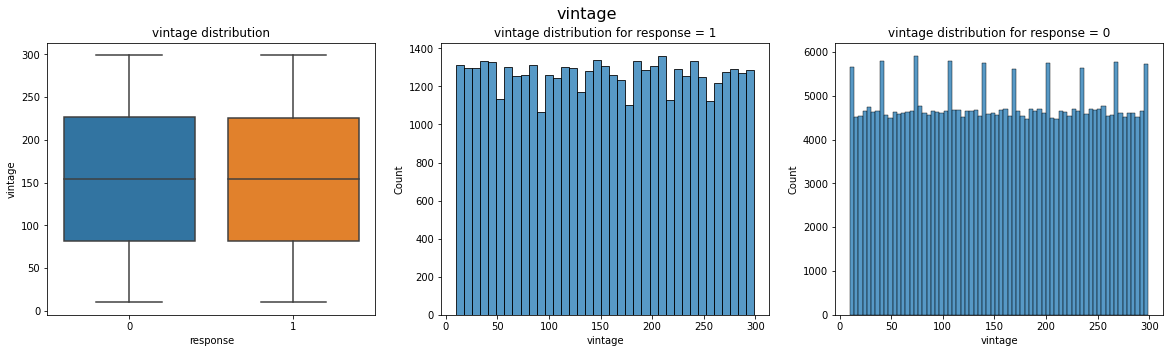

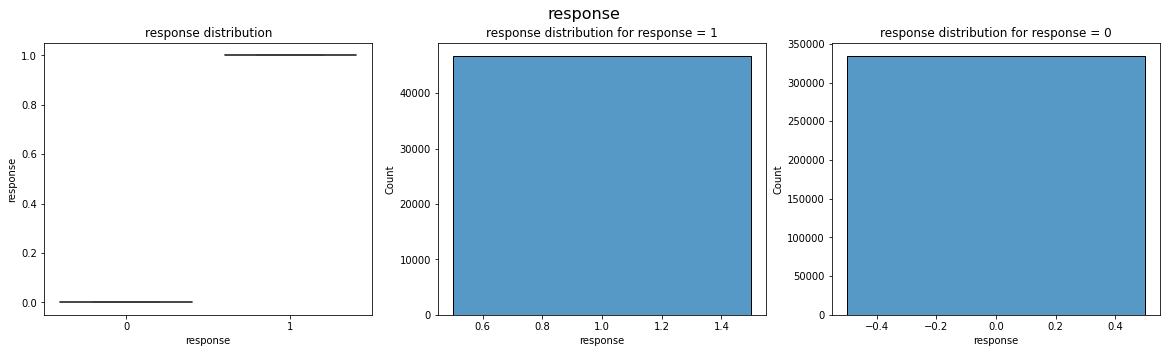

In [35]:
variablhes = df4.columns

for variable in variablhes:
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    fig.patch.set_facecolor('white')
    plt.suptitle(f'{variable}', fontsize=16)
    
    sns.boxplot(x='response', y=variable, data=df4, ax=axs[0])
    axs[0].set_title(f'{variable} distribution')

    sns.histplot(df4.loc[df4['response'] == 1, variable], ax=axs[1])
    axs[1].set_title(f'{variable} distribution for response = 1')

    sns.histplot(df4.loc[df4['response'] == 0, variable], ax=axs[2])
    axs[2].set_title(f'{variable} distribution for response = 0')

    plt.show()


<AxesSubplot:xlabel='response', ylabel='age'>

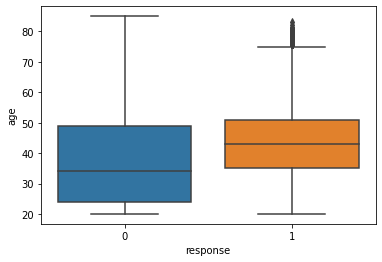

In [20]:
# Age
sns.boxplot(x='response', y='age', data=df4)

Text(0.5, 1.0, 'Response = 0')

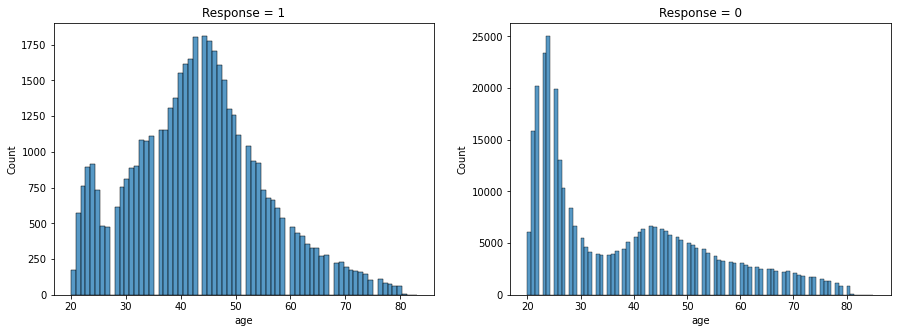

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df4.loc[df4['response'] == 1, 'age'], ax=axs[0])
sns.histplot(df4.loc[df4['response'] == 0, 'age'], ax=axs[1])
axs[0].set_title('Response = 1')
axs[1].set_title('Response = 0')

<AxesSubplot:xlabel='response', ylabel='annual_premium'>

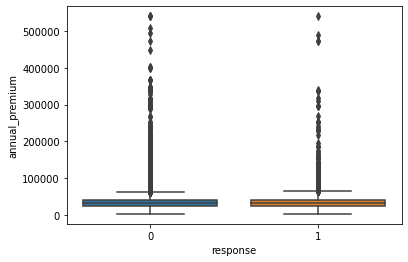

In [26]:
# annual_premium
sns.boxplot(x='response', y='annual_premium', data=df4)

Text(0.5, 1.0, 'Response = 0')

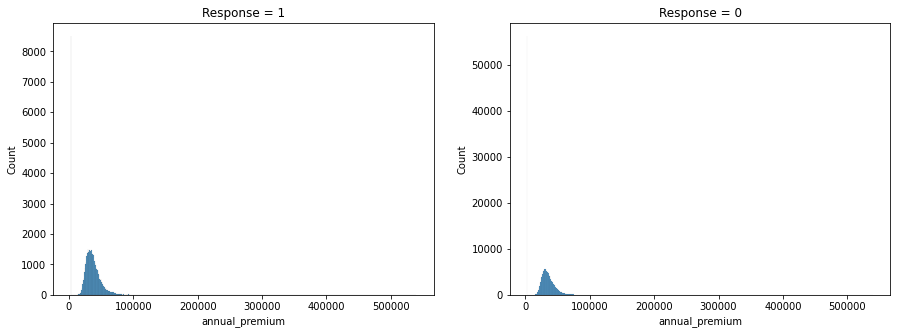

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df4.loc[df4['response'] == 1, 'annual_premium'], ax=axs[0])
sns.histplot(df4.loc[df4['response'] == 0, 'annual_premium'], ax=axs[1])
axs[0].set_title('Response = 1')
axs[1].set_title('Response = 0')

# 5.0. Feature Selection

# 6.0. Data Preparation

# 7.0. Machine Learning